In [1]:
import pandas as pd
import folium
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Hiroshima 平和関連施設.csv')
df2 = pd.read_csv('Hiroshima 小学校.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   名称      9 non-null      object 
 1   名称かな    0 non-null      float64
 2   所在地     9 non-null      object 
 3   TEL     0 non-null      float64
 4   FAX     0 non-null      float64
 5   URL     9 non-null      object 
 6   備考      0 non-null      float64
 7   郵便番号    0 non-null      float64
 8   参考URL2  0 non-null      float64
 9   施設ID    9 non-null      object 
 10  経度      9 non-null      float64
 11  緯度      9 non-null      float64
 12  分類      9 non-null      object 
dtypes: float64(8), object(5)
memory usage: 1.0+ KB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   名称      141 non-null    object 
 1   名称かな    0 non-null      float64
 2   所在地     141 non-null    object 
 3   TEL     141 non-null    object 
 4   FAX     141 non-null    object 
 5   URL     141 non-null    object 
 6   備考      0 non-null      float64
 7   郵便番号    0 non-null      float64
 8   施設ID    141 non-null    object 
 9   経度      141 non-null    float64
 10  緯度      141 non-null    float64
 11  分類      141 non-null    object 
dtypes: float64(5), object(7)
memory usage: 13.3+ KB


In [5]:
center_lat = df['緯度'].mean()
center_lon = df['経度'].mean()

In [27]:
m = folium.Map(location=[center_lat,center_lon], zoom_start=12)

# df をループしてマーカーを作る
for index, row in df.iterrows():
    latlon = [row['緯度'],row['経度']]
    folium.Marker(latlon, 
                  # popup='<div style="width:350px">'+row['description']+'</div>', 
                  tooltip=row['名称'],
                  # icon=folium.Icon(color=row['color']
                ).add_to(m)
    folium.Circle(latlon,
                  radius=500,
                  color='red',
                  fill=True,
                  fill_color='red',
                  fill_opacity=0.2
        
    ).add_to(m)

# df2 をループしてマーカーを作る
for index, row in df2.iterrows():
    latlon = [row['緯度'],row['経度']]
    # folium.Marker(latlon, 
    #               # popup='<div style="width:350px">'+row['description']+'</div>', 
    #               tooltip=row['名称'],
    #               # icon=folium.Icon(color=row['color']
    #             ).add_to(m)
    folium.CircleMarker(latlon,
                  radius=6,
                  color='orange',
                  fill=True,
                  tooltip=row['名称'],
                  fill_color='orange',
                  fill_opacity=1.0
        
    ).add_to(m)










# show the map
m

Text(0.5, 1.0, '高齢者はどこにいるの？')

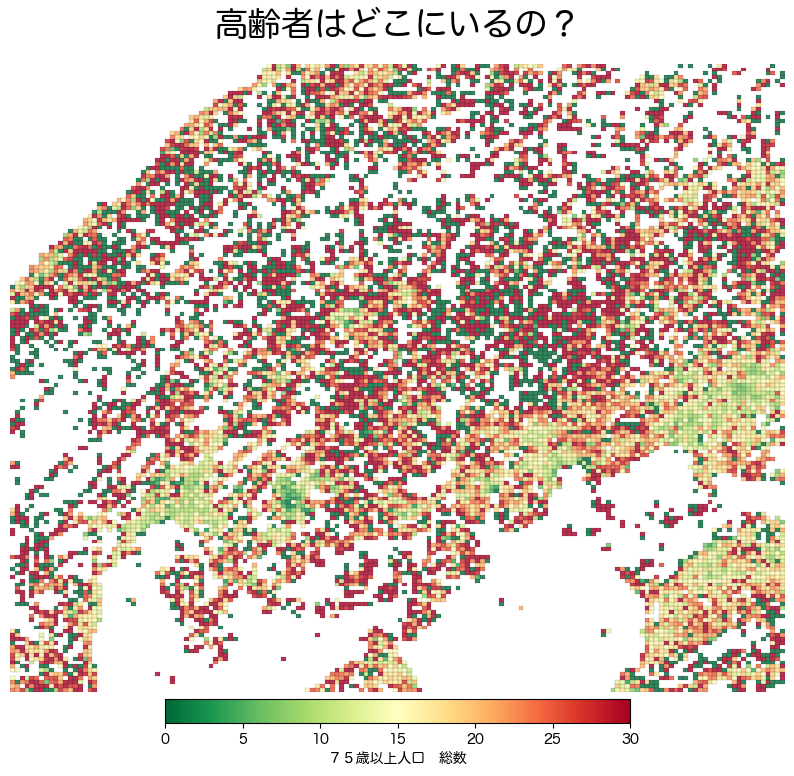

In [ ]:
# 正規化された値を計算する
hiroshimamesh['Percent75over'] = hiroshimamesh['T001100022'] / hiroshimamesh['T001100001']*100

# コロプレスマップをプロットする
fig, ax = plt.subplots(figsize=(10, 10))

hiroshimamesh.plot(ax=ax,
               column='Percent75over',
               legend=True,
               cmap='RdYlGn_r',
               edgecolor='black',
               linewidth=0.1,
               alpha=0.8,
               vmax=30,
               legend_kwds={'label': '７５歳以上人口　総数', 'shrink': 0.6, 'orientation': 'horizontal', 'pad': 0.01}
              )

# マップの範囲を chibamesh の境界に設定する
ax.set_xlim(hiroshimamesh.total_bounds[0], hiroshimamesh.total_bounds[2])
ax.set_ylim(hiroshimamesh.total_bounds[1], hiroshimamesh.total_bounds[3])

# 軸を非表示にする
ax.axis('off')

# タイトルを設定する
ax.set_title('高齢者はどこにいるの？', fontsize=24, pad=20)

# ベースマップを追加する
# cx.add_basemap(ax, source='https://cyberjapandata.gsi.go.jp/xyz/pale/{z}/{x}/{y}.png')